<a href="https://colab.research.google.com/github/ZefraAlseif/Panda-vs-Dogs-Cats/blob/main/Panda_vs_Dog_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from io import StringIO
from sklearn.preprocessing import LabelEncoder
import sklearn 
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import copy
from keras.engine.input_layer import Input
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from google.colab import files
import os, shutil, pathlib
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras import regularizers
from sklearn.utils import validation

# Uploading Kaggle JSon File

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zefraalseif","key":"4d760edb603221467e663ad64da78007"}'}

# Removing/Creating Directory for Kaggle


In [ ]:
!rm -r ~/.kaggle/
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/': No such file or directory


# Importing Dataset

In [ ]:
!kaggle datasets download -d ashishsaxena2209/animal-image-datasetdog-cat-and-panda

 94% 354M/376M [00:02<00:00, 147MB/s]
100% 376M/376M [00:02<00:00, 140MB/s]


# Unzipping Dataset

In [ ]:
!unzip -qq animal-image-datasetdog-cat-and-panda.zip

# New Directory Structure

In [ ]:
original_dir = pathlib.Path('animals')
new_base_dir = pathlib.Path('newanim')

def make_subset(subset_name, start_index, end_index):
  for category in ('cats','dogs','panda'):
    dir = new_base_dir / subset_name / category
    dirsrc = original_dir / category
    os.makedirs(dir)
    fnames = ['{}_{:05d}.jpg'.format(category,i) for i in range (start_index, end_index)]
    for fname in fnames:
      shutil.copyfile(src=dirsrc / fname , dst = dir / fname)

make_subset('train', start_index=1, end_index=701)
make_subset('validation', start_index=701, end_index=901)
make_subset('test', start_index=901,end_index=1001) 

# Remove the Cat Directories

In [ ]:
!rm -r ./newanim/train/cats/
!rm -r ./newanim/validation/cats/
!rm -r ./newanim/test/cats/

# Creating TensorFlow Dataset

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size = (180,180),
    batch_size = 32)
valdiation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size = (180,180),
    batch_size = 32)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size = (180,180),
    batch_size = 32)

Found 1400 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Found 200 files belonging to 2 classes.


# Displaying shape of Dataset

In [ ]:
for data_batch, labels_batch in train_dataset:
  print("data batch shape:", data_batch.shape)
  print("labels batch shape:", labels_batch.shape)
  break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


# CNN Model Panda vs Dog (pvdm1)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3,activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
pvdm1 = keras.Model(inputs=inputs, outputs=outputs)

pvdm1.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_25 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                      

## Configure Model for Training

In [ ]:
pvdm1.compile(loss = "binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Fitting the Model using a Dataset

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="pvdm1.h5",
        save_best_only = True,
        monitor = "val_loss")
]

history1 = pvdm1.fit(
    train_dataset,
    epochs = 8,
    validation_data = valdiation_dataset,
    callbacks = callbacks
)

Epoch 1/8
44/44 [==============================] - 5s 79ms/step - loss: 0.8055 - accuracy: 0.7214 - val_loss: 0.5475 - val_accuracy: 0.8050
Epoch 2/8
44/44 [==============================] - 4s 77ms/step - loss: 0.4204 - accuracy: 0.8214 - val_loss: 0.3257 - val_accuracy: 0.8650
Epoch 3/8
44/44 [==============================] - 4s 74ms/step - loss: 0.3917 - accuracy: 0.8336 - val_loss: 0.3341 - val_accuracy: 0.8750
Epoch 4/8
44/44 [==============================] - 4s 75ms/step - loss: 0.3833 - accuracy: 0.8314 - val_loss: 0.2748 - val_accuracy: 0.8900
Epoch 5/8
44/44 [==============================] - 4s 75ms/step - loss: 0.3326 - accuracy: 0.8564 - val_loss: 0.2734 - val_accuracy: 0.8925
Epoch 6/8
44/44 [==============================] - 4s 74ms/step - loss: 0.2811 - accuracy: 0.8871 - val_loss: 0.3050 - val_accuracy: 0.8900
Epoch 7/8
44/44 [==============================] - 4s 74ms/step - loss: 0.2677 - accuracy: 0.8993 - val_loss: 0.2422 - val_accuracy: 0.9000
Epoch 8/8
44/44 [===

## Displaying Curves of Loss and Accuracy during Training

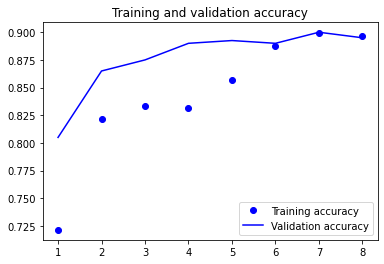

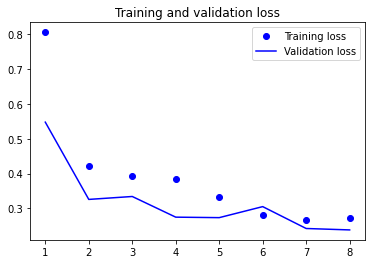

Final Training loss:  0.2734917998313904 
Final Training Accuracy:  0.8964285850524902
Final Validation loss:  0.23817463219165802 
Final Validation Accuracy:  0.8949999809265137


In [ ]:
accuracy = history1.history["accuracy"]
val_accuracy = history1.history["val_accuracy"]
loss = history1.history["loss"]
val_loss = history1.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history1.history['loss'][-1],"\nFinal Training Accuracy: ", history1.history['accuracy'][-1])
print("Final Validation loss: ",history1.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history1.history['val_accuracy'][-1])

## Evaluate Model

In [ ]:
pvdm1.evaluate(test_dataset)

# CNN Model 2 Panda vs Dog (w/L2) (pvdm2)

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
pvdm2 = keras.Model(inputs=inputs, outputs=outputs)

pvdm2.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_50 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                     

## Configure Model for Training

In [ ]:
pvdm2.compile(loss = "binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Fitting the Model using a Dataset

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="pvdm2.h5",
        save_best_only = True,
        monitor = "val_loss")
]

history2 = pvdm2.fit(
    train_dataset,
    epochs = 10,
    validation_data = valdiation_dataset,
    callbacks = callbacks

)

Epoch 1/10
44/44 [==============================] - 5s 77ms/step - loss: 0.7925 - accuracy: 0.6957 - val_loss: 0.6620 - val_accuracy: 0.7025


KeyboardInterrupt: ignored

## Displaying Curves of Loss and Accuracy during Training

In [ ]:
accuracy = history2.history["accuracy"]
val_accuracy = history2.history["val_accuracy"]
loss = history2.history["loss"]
val_loss = history2.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history2.history['loss'][-1],"\nFinal Training Accuracy: ", history2.history['accuracy'][-1])
print("Final Validation loss: ",history2.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history2.history['val_accuracy'][-1])

## Evaluate Model

In [ ]:
pvdm2.evaluate(test_dataset)

# CNN Model 3 Panda vs Dog (w/Data Augmentation) (pvdm3)

In [ ]:
data_augmentation = keras.Sequential(
    [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(.1),
      layers.RandomZoom(.2)
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(.15)(x)
x = layers.Conv2D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(.25)(x)
x = layers.Conv2D(filters=128, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(.5)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(.25)(x)
x = layers.Conv2D(filters=256, kernel_size=3, kernel_regularizer=regularizers.l2(.0001),activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(.25)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
pvdm3 = keras.Model(inputs=inputs, outputs=outputs)

pvdm3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                             

## Configure Model for Training

In [ ]:
pvdm3.compile(loss = "binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

## Fitting the Model using a Dataset

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="pvdm3.h5",
        save_best_only = True,
        monitor = "val_loss")
]

history3 = pvdm3.fit(
    train_dataset,
    epochs = 150,
    validation_data = valdiation_dataset,
    callbacks = callbacks

)

Epoch 1/150
44/44 [==============================] - 17s 104ms/step - loss: 0.7320 - accuracy: 0.6350 - val_loss: 0.5768 - val_accuracy: 0.8075
Epoch 2/150
44/44 [==============================] - 4s 84ms/step - loss: 0.5395 - accuracy: 0.8071 - val_loss: 0.4522 - val_accuracy: 0.8550
Epoch 3/150
44/44 [==============================] - 4s 86ms/step - loss: 0.4643 - accuracy: 0.8114 - val_loss: 0.3899 - val_accuracy: 0.8575
Epoch 4/150
44/44 [==============================] - 4s 84ms/step - loss: 0.4278 - accuracy: 0.8236 - val_loss: 0.4050 - val_accuracy: 0.8425
Epoch 5/150
44/44 [==============================] - 4s 85ms/step - loss: 0.4016 - accuracy: 0.8400 - val_loss: 0.3658 - val_accuracy: 0.8675
Epoch 6/150
44/44 [==============================] - 4s 84ms/step - loss: 0.3736 - accuracy: 0.8486 - val_loss: 0.3546 - val_accuracy: 0.8675
Epoch 7/150
44/44 [==============================] - 5s 95ms/step - loss: 0.3524 - accuracy: 0.8643 - val_loss: 0.3089 - val_accuracy: 0.8925
Epoc

## Displaying Curves of Loss and Accuracy during Training

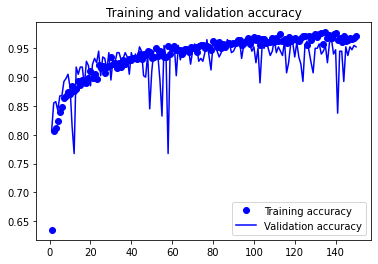

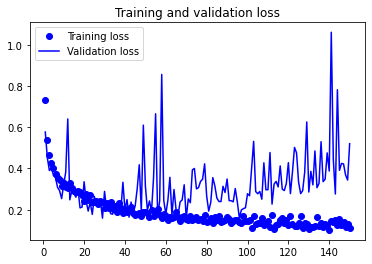

Final Training loss:  0.110855832695961 
Final Training Accuracy:  0.9714285731315613
Final Validation loss:  0.5202299952507019 
Final Validation Accuracy:  0.9524999856948853


In [ ]:
accuracy = history3.history["accuracy"]
val_accuracy = history3.history["val_accuracy"]
loss = history3.history["loss"]
val_loss = history3.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()
# Final Values
print("Final Training loss: ",history3.history['loss'][-1],"\nFinal Training Accuracy: ", history3.history['accuracy'][-1])
print("Final Validation loss: ",history3.history['val_loss'][-1],"\nFinal Validation Accuracy: ", history3.history['val_accuracy'][-1])

## Evaluate Model

In [ ]:
pvdm3.evaluate(test_dataset)


7/7 [==============================] - 1s 41ms/step - loss: 0.2579 - accuracy: 0.9450


[0.2579241693019867, 0.9449999928474426]